<a href="https://colab.research.google.com/github/coldapache/FoliumPythonFireStationProject/blob/main/Spatial_Graph_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-18-4150c37e9be4>:50: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


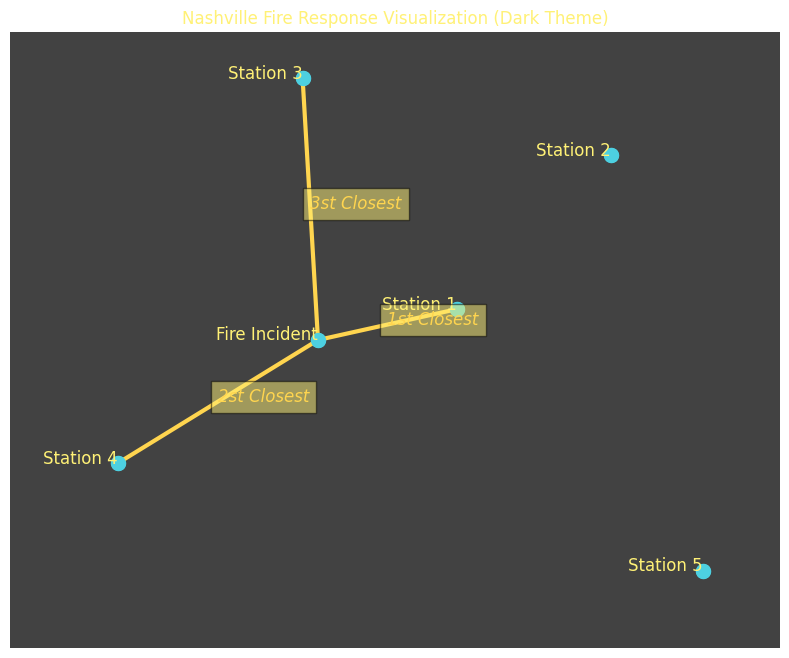

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import geopy.distance


# Define a dark theme style
node_color = '#4DD0E1'  # Light blue for nodes
edge_color = '#FFD54F'  # Yellow for edges
label_color = '#FFF176'  # Light yellow for labels
map_edge_color = 'white'
map_face_color = '#424242'  # Dark gray for map

# Example data: Coordinates of fire departments and a fire incident in Nashville
fire_dept_data = {
    'Location': ['Station 1', 'Station 2', 'Station 3', 'Station 4', 'Station 5', 'Fire Incident'],
    'Latitude': [36.162, 36.172, 36.177, 36.152, 36.145, 36.160],
    'Longitude': [-86.771, -86.761, -86.781, -86.793, -86.755, -86.780]
}

# Convert to DataFrame
df = pd.DataFrame(fire_dept_data)

# Function to calculate distance
def calc_distance(coord1, coord2):
    return geopy.distance.distance(coord1, coord2).km

# Calculate distances and sort
fire_location = (df.loc[df['Location'] == 'Fire Incident', 'Latitude'].iloc[0],
                 df.loc[df['Location'] == 'Fire Incident', 'Longitude'].iloc[0])
df['Distance'] = df.apply(lambda x: calc_distance((x['Latitude'], x['Longitude']), fire_location), axis=1)
closest_stations = df[df['Location'] != 'Fire Incident'].sort_values('Distance').head(3)

# Initialize a NetworkX graph
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['Location'], pos=(row['Longitude'], row['Latitude']))
    if row['Location'] in closest_stations['Location'].values:
        G.add_edge('Fire Incident', row['Location'], label=f"{list(closest_stations['Location']).index(row['Location'])+1}st Closest")

# Convert the data for geopandas
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot base map of Nashville with dark theme
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa.name == 'United States of America']
usa.plot(ax=ax, color=map_face_color, edgecolor=map_edge_color)

# Plot the fire stations and incident
gdf.plot(ax=ax, marker='o', color=node_color, markersize=100)

# Draw networkx edges and nodes
node_pos = {node:(data['pos']) for node, data in G.nodes(data=True)}
nx.draw_networkx_edges(G, node_pos, ax=ax, edge_color=edge_color, width=3)
nx.draw_networkx_nodes(G, node_pos, ax=ax, node_color=node_color, node_size=100)

# Add labels to nodes and edges
for node, (lon, lat) in node_pos.items():
    ax.text(lon, lat, node, fontsize=12, color=label_color, horizontalalignment='right')

for u, v, data in G.edges(data=True):
    ax.text((node_pos[u][0] + node_pos[v][0]) / 2, (node_pos[u][1] + node_pos[v][1]) / 2, data['label'], style='italic', fontsize=12, color=edge_color, bbox={'facecolor': label_color, 'alpha': 0.5, 'pad': 5})

plt.title('Nashville Fire Response Visualization (Dark Theme)', color=label_color)

# Zoom in on Nashville
ax.set_xlim(-86.8, -86.75)
ax.set_ylim(36.14, 36.18)

plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()


In [19]:
pip install contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 59.5 MB/s eta 0:00:00


In [20]:
class ThemeManager:
    def __init__(self):
        self.themes = {
            "dark_theme_1": {
                "node_color": "#fb7257",
                "edge_color": "#f03f2b",
                "label_color": "#121212",
                "map_edge_color": "white",
                "map_face_color": "#424242"
            },
            "dark_theme_2": {
                "node_color": "#2b84f0",
                "edge_color": "#b2c6fa",
                "label_color": "#121212",
                "map_edge_color": "white",
                "map_face_color": "#424242"
            },
            "dark_theme_3": {
                # ... colors for third theme
            }
            # ... more themes
        }

    def get_theme(self, theme_name):
        return self.themes.get(theme_name, self.themes["dark_theme_1"])  # default to dark_theme_1
theme_manager = ThemeManager() #imports the theme manager class
current_theme = theme_manager.get_theme("dark_theme_2") #designates the current class

In [21]:
theme_manager = ThemeManager() #imports the theme manager class
current_theme = theme_manager.get_theme("dark_theme_2") #designates the current class

In [22]:
print(current_theme)

{'node_color': '#2b84f0', 'edge_color': '#b2c6fa', 'label_color': '#121212', 'map_edge_color': 'white', 'map_face_color': '#424242'}


In [23]:
# Define a dark theme style
node_color = current_theme["node_color"]  # for nodes
edge_color = current_theme["edge_color"]  # for edges
label_color = current_theme["label_color"]  # for labels
map_edge_color = current_theme["map_edge_color"] #map_edge_color
map_face_color = current_theme["map_face_color"]  # map_face_color

In [28]:

# Example data: Coordinates of fire departments and a fire incident in Nashville
fire_dept_data = {
    'Location': ['Station 1', 'Station 2', 'Station 3', 'Station 4', 'Station 5', 'Fire Incident'],
    'Latitude': [36.162, 36.172, 36.177, 36.152, 36.145, 36.160],
    'Longitude': [-86.771, -86.761, -86.781, -86.793, -86.755, -86.780]
}


# Convert to DataFrame
df = pd.DataFrame(fire_dept_data)

# Function to calculate distance
def calc_distance(coord1, coord2):
    return geopy.distance.distance(coord1, coord2).km

# Calculate distances and sort
fire_location = (df.loc[df['Location'] == 'Fire Incident', 'Latitude'].iloc[0],
                 df.loc[df['Location'] == 'Fire Incident', 'Longitude'].iloc[0])
df['Distance'] = df.apply(lambda x: calc_distance((x['Latitude'], x['Longitude']), fire_location), axis=1)
closest_stations = df[df['Location'] != 'Fire Incident'].sort_values('Distance').head(3)

# Initialize a NetworkX graph
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['Location'], pos=(row['Longitude'], row['Latitude']))
    if row['Location'] in closest_stations['Location'].values:
        G.add_edge('Fire Incident', row['Location'], label=f"{list(closest_stations['Location']).index(row['Location'])+1}st Closest")

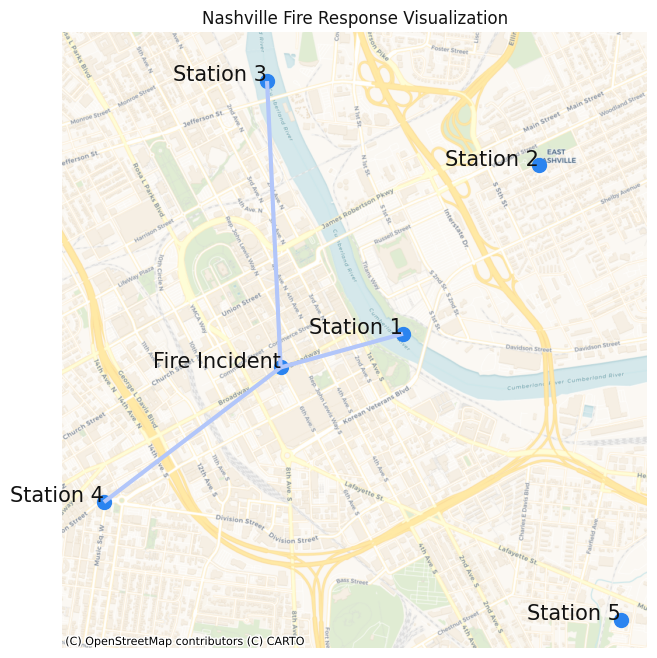

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import pandas as pd
import contextily as ctx
from shapely.geometry import Point

# ... [previous setup code for your data]

# Convert the node positions to a GeoDataFrame
node_pos_list = [{'Location': node, 'geometry': Point(lon, lat)} for node, (lon, lat) in node_pos.items()]
nodes_gdf = gpd.GeoDataFrame(node_pos_list, crs='EPSG:4326')
nodes_gdf = nodes_gdf.to_crs(epsg=3857)

# Update the positions for drawing edges in Web Mercator
node_pos_mercator = nodes_gdf.set_index('Location')['geometry'].apply(lambda p: (p.x, p.y)).to_dict()

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot nodes
nodes_gdf.plot(ax=ax, marker='o', color=node_color, markersize=100)

# Draw networkx edges
nx.draw_networkx_edges(G, node_pos_mercator, ax=ax, edge_color=edge_color, width=3)

# Add labels to nodes
for node, pos in node_pos_mercator.items():
    ax.text(pos[0], pos[1], node, fontsize=15, color=label_color, horizontalalignment='right')

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

plt.title('Nashville Fire Response Visualization', color=label_color)
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()


In [ ]:
#if dataframe is a csv file
#df = pd.read_csv('/content/airports_csv.csv')

In [ ]:
print(current_theme)

{'node_color': '#2b84f0', 'edge_color': '#b2c6fa', 'label_color': '#121212', 'map_edge_color': 'white', 'map_face_color': '#424242'}


In [ ]:
class ThemeManager:
    def __init__(self):
        self.themes = {
            "dark_theme_1": {
                "node_color": "#fb7257",
                "edge_color": "#f03f2b",
                "label_color": "#121212",
                "map_edge_color": "white",
                "map_face_color": "#424242"
            },
            "dark_theme_2": {
                "node_color": "#2b84f0",
                "edge_color": "#b2c6fa",
                "label_color": "#121212",
                "map_edge_color": "white",
                "map_face_color": "#424242"
            },
            "dark_theme_3": {
                # ... colors for third theme
            }
            # ... more themes
        }

    def get_theme(self, theme_name):
        return self.themes.get(theme_name, self.themes["dark_theme_1"])  # default to dark_theme_1

theme_manager = ThemeManager() #imports the theme manager class
current_theme = theme_manager.get_theme("dark_theme_2") #designates the current class

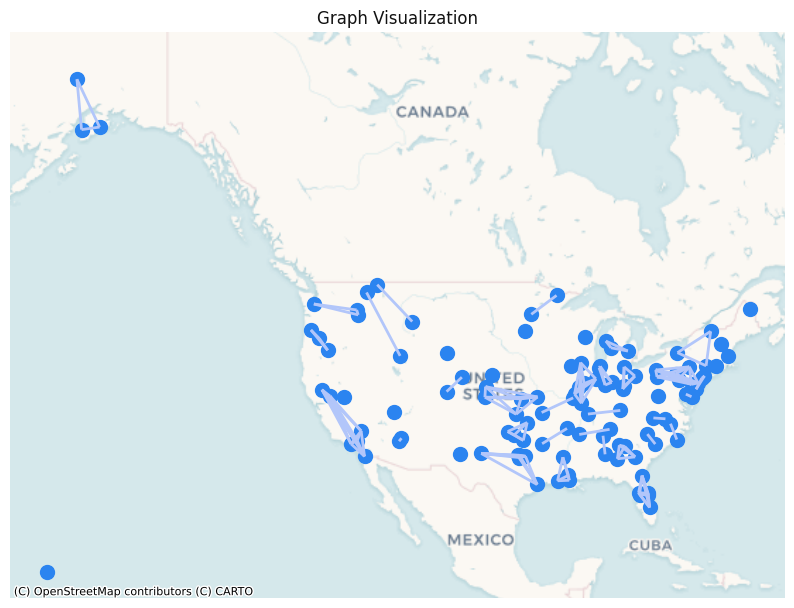

In [ ]:

class GraphVisualizer:
    def __init__(self, theme, node_id_col, lat_col, lon_col, basemap_style=ctx.providers.CartoDB.Voyager, map_edge_color='white', plot_title='Graph Visualization'):
        self.theme = theme
        self.node_id_col = node_id_col
        self.lat_col = lat_col
        self.lon_col = lon_col
        self.basemap_style = basemap_style
        self.map_edge_color = map_edge_color
        self.plot_title = plot_title

    def create_and_visualize(self, df, edge_col):
        # Initialize graph
        G = nx.Graph()

        # Add nodes with positions
        for index, row in df.iterrows():
            G.add_node(row[self.node_id_col], pos=(row[self.lon_col], row[self.lat_col]))

        # Create edges based on shared attribute values in the edge_col
        grouped = df.groupby(edge_col)
        for group, data in grouped:
            nodes = data[self.node_id_col].tolist()
            # Create edges between all nodes within the same group
            for i in range(len(nodes)):
                for j in range(i + 1, len(nodes)):
                    G.add_edge(nodes[i], nodes[j])


        # Convert the node positions to a GeoDataFrame
        node_pos_list = [{'Location': node, 'geometry': Point(lon, lat)} for node, (lon, lat) in nx.get_node_attributes(G, 'pos').items()]
        nodes_gdf = gpd.GeoDataFrame(node_pos_list, crs='EPSG:4326')
        nodes_gdf = nodes_gdf.to_crs(epsg=3857)

        # Update the positions for drawing edges in Web Mercator
        node_pos_mercator = nodes_gdf.set_index('Location')['geometry'].apply(lambda p: (p.x, p.y)).to_dict()

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 8))

        # Plot nodes
        nodes_gdf.plot(ax=ax, marker='o', color=self.theme['node_color'], markersize=100)

        # Draw networkx edges
        nx.draw_networkx_edges(G, node_pos_mercator, ax=ax, edge_color=self.theme['edge_color'], width=2)

        # Optionally, add labels to nodes
        #for node, pos in node_pos_mercator.items():
          #ax.text(pos[0], pos[1], node, fontsize=12, color=self.theme['label_color'], horizontalalignment='right')

        # Add a basemap
        ctx.add_basemap(ax, source=self.basemap_style)

        # Set map edge color
        for spine in ax.spines.values():
            spine.set_edgecolor(self.map_edge_color)

        plt.title(self.plot_title, color=self.theme['label_color'])
        plt.axis('off')  # Turn off the axis for a cleaner look
        plt.show()


# Instantiate the visualizer with the column names for node id, latitude, and longitude
visualizer = GraphVisualizer(current_theme, node_id_col='ident', lat_col='latitude_deg', lon_col='longitude_deg')

# Now, when you call the create_and_visualize method, you can pass in the DataFrame and the edge column name
# The latitude and longitude column names are already stored in the visualizer instance and will be used dynamically
visualizer.create_and_visualize(df, 'subregion')  # Replace 'iso_region' with your edge column
